In [1]:
%load_ext autoreload
%autoreload 2
from awesome.run.awesome_config import AwesomeConfig
from awesome.run.awesome_runner import AwesomeRunner
from awesome.util.reflection import class_name
from awesome.analytics.result_model import ResultModel
from awesome.util.path_tools import get_project_root_path, get_package_root_path
import os
import torch
import re
from awesome.util.format import latex_postprocessor

os.chdir(get_project_root_path()) # Beeing in the root directory of the project is important for the relative paths to work consistently

D:\projects\AWESOME\awesome\agent\torch_agent.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
from awesome.analytics.result_comparison import ResultComparison


paths = ['./runs/Benchmarks', "./runs/Diffeomorphism"]

models = []

for path in paths:
    for folder in os.listdir(path):
        model = ResultModel.from_path(os.path.join(path, folder))
        models.append(model)

import re
p = r"#?(?P<cfg_num>\d+)?_?(?P<net>\w+)_benchmark(?P<feat>(\+\w+)*)\_(?P<date>\d{2}_\d{2}_\d{2})\_(?P<time>\d{2}_\d{2}_\d{2})"
pattern = re.compile(p)

for model in models:
    match = pattern.match(model.name)
    model_name = None
    feat = []
    if match:
        model_name = match.group('net')
        features = match.group('feat')
        if features is not None and features != "":
            feat = features.strip("+").split("+")
            if "featxy" in feat:
                feat.remove("featxy")
                feat.append("feat")
                feat.append("xy")
            feat = sorted(feat)
    else:
        print('No match for', model.name)
    model_name = model_name.replace("NET", "Net")
    model.display_name = model_name + " " + " ".join(feat)
    model.config.result_directory = "final_mask"
    model.save_config()


# Resort the models by name to get a meaningful table order

_order = ['05_CNNET_benchmark+xy_23_09_15_11_23_00',
 '#02_CNNET_benchmark+xy+convex_23_09_14_15_38_28',
 '#06_CNNET_benchmark+featxy_23_09_14_15_51_37',
 '07_CNNET_benchmark+featxy+convex_23_09_14_16_55_48',
 '#04_CNNET_benchmark+feat_23_09_14_15_51_19',
 '03_CNNET_benchmark+feat+convex_23_09_14_16_53_26',
 '#13_FCNET_benchmark+xy_23_09_14_16_17_02',
 '#1_FCNET_benchmark+xy+diffeo_23_09_15_14_03_01',
 '#11_FCNET_benchmark+xy+convex_23_09_14_16_00_04',
 '#01_FCNET_benchmark+featxy_23_09_14_15_35_38',
 '#0_FCNET_benchmark+featxy+diffeo_23_09_15_13_58_53',
 '#09_FCNET_benchmark+featxy+convex_23_09_14_15_55_38',
 '09_FCNET_benchmark+featxy+convex_23_09_14_17_03_19',
 '#12_FCNET_benchmark+feat_23_09_14_16_01_18',
 '#2_FCNET_benchmark+feat+diffeo_23_09_15_14_03_02',
 '#08_FCNET_benchmark+feat+convex_23_09_14_15_55_38',
 '#00_NET_benchmark_23_09_14_15_31_07',
 'NET_benchmark+diffeo_23_09_18_17_04_55',
 '#10_NET_benchmark+convex_23_09_14_15_56_02']

models = sorted(models, key=lambda m: _order.index(m.name))

comparison = ResultComparison(models)
comparison.assign_numbers(force=True)

os.environ['PLOT_OUTPUT_DIR'] = comparison.output_folder

save_args = dict(transparent=False, save=True, dpi=300, ext=["png", "pdf"])

models

[ResultModel(config=ResultModelConfig(name='CNNet xy', number=1, result_directory='final_mask', epochs=[1000], image_indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), output_directory=./runs/Benchmarks\05_CNNET_benchmark+xy_23_09_15_11_23_00, numbering=True, index=[...], checkpoint_index=[...], _run_config=None, _runners={}, run_config_path=./runs/Benchmarks\05_CNNET_benchmark+xy_23_09_15_11_23_00\init_cfg_awesome_config.yaml, rerun_parent=None, getitem_mask_mode=mask, getitem_epoch=-1),
 ResultModel(config=ResultModelConfig(name='CNNet convex xy', number=2, result_directory='final_mask', epochs=[1000], image_indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), output_directory=./runs

In [5]:
comparison.open_folder()

In [10]:
models[-2][0]

tensor([[[0., 0., 0.,  ..., 0., 1., 1.],
         [0., 0., 1.,  ..., 1., 1., 1.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [ ]:
models[-2].plot_mask(0)

Processing images...:   0%|          | 0/51 [00:00<?, ?it/s]

D:\projects\AWESOME\awesome\analytics\result_model.py:471: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'TorchAgentCheckpoint(id=None, name='#02_CNNET_benchmark+xy+convex', model_state=None, model_args='[...]', model_type=<class 'awesome.model.wrapper_module.WrapperModule'>, criterion='[...]', tracker='[...]', dataset_config='[...]', saved_at=datetime.datetime(2023, 9, 14, 17, 31, 28, 585645, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200), 'CEST')), runs_directory='./runs', agent_class_name=None, execution_context={'tqdm': False}, model_state_dict='[...]', optimizer_state_dict='[...]', optimizer_type=<class 'torch.optim.adam.Adam'>, optimizer_args={'amsgrad': False, 'betas': (0.9, 0.999), 'eps': 1e-08, 'lr': 0.02, 'weight_decay': 0})' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  self.checkpoint_index.loc[index, 'checkpoint'] = checkpoint
ERROR:root:Could not 

In [31]:
models[1].open_folder()

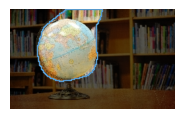

In [15]:
fig = models[-2].plot_mask(0, mode='prior_mask', **save_args, tight=True)

In [15]:
comparison.open_folder()

D:\projects\AWESOME\awesome\analytics\result_model.py:396: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'TorchAgentCheckpoint(id=None, name='05_CNNET_benchmark+xy', model_state=None, model_args='[...]', model_type=<class 'awesome.model.wrapper_module.WrapperModule'>, criterion='[...]', tracker='[...]', dataset_config='[...]', saved_at=datetime.datetime(2023, 9, 15, 12, 10, 1, 410116, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200), 'CEST')), runs_directory='./runs', agent_class_name=None, execution_context={'tqdm': False}, model_state_dict='[...]', optimizer_state_dict='[...]', optimizer_type=<class 'torch.optim.adam.Adam'>, optimizer_args={'amsgrad': False, 'betas': (0.9, 0.999), 'eps': 1e-08, 'lr': 0.02, 'weight_decay': 0})' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  Parameters
D:\projects\AWESOME\awesome\analytics\result_model.py:396: FutureWarning: Setti

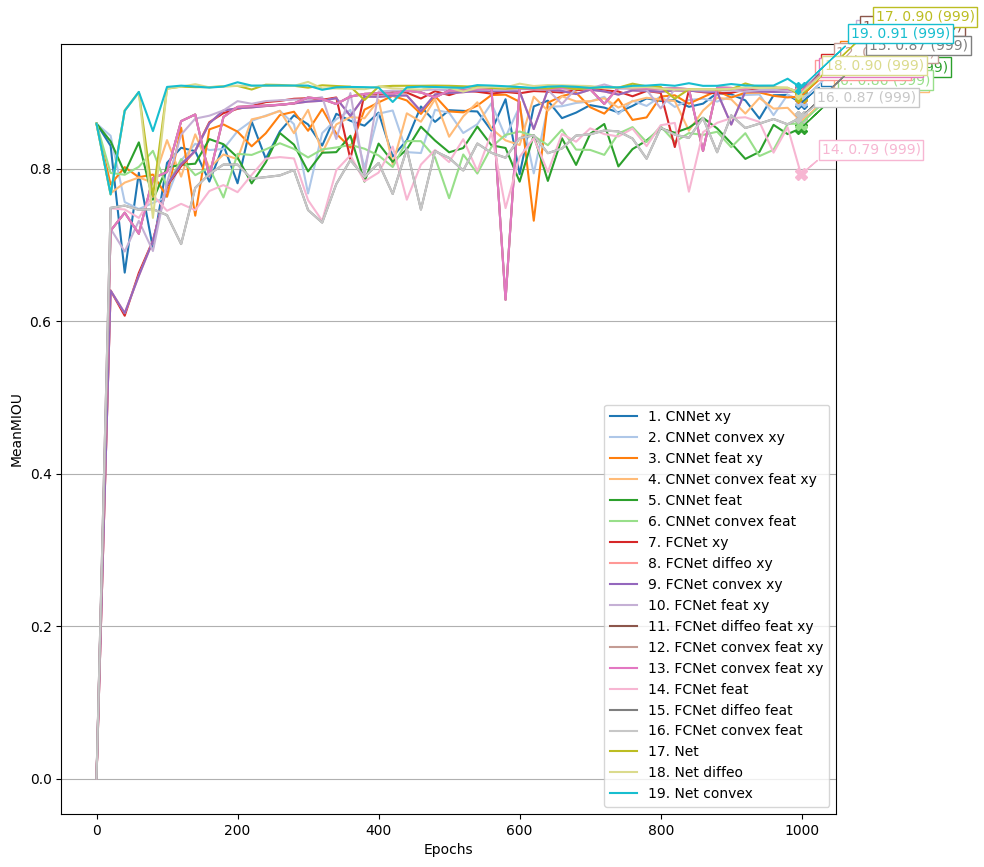

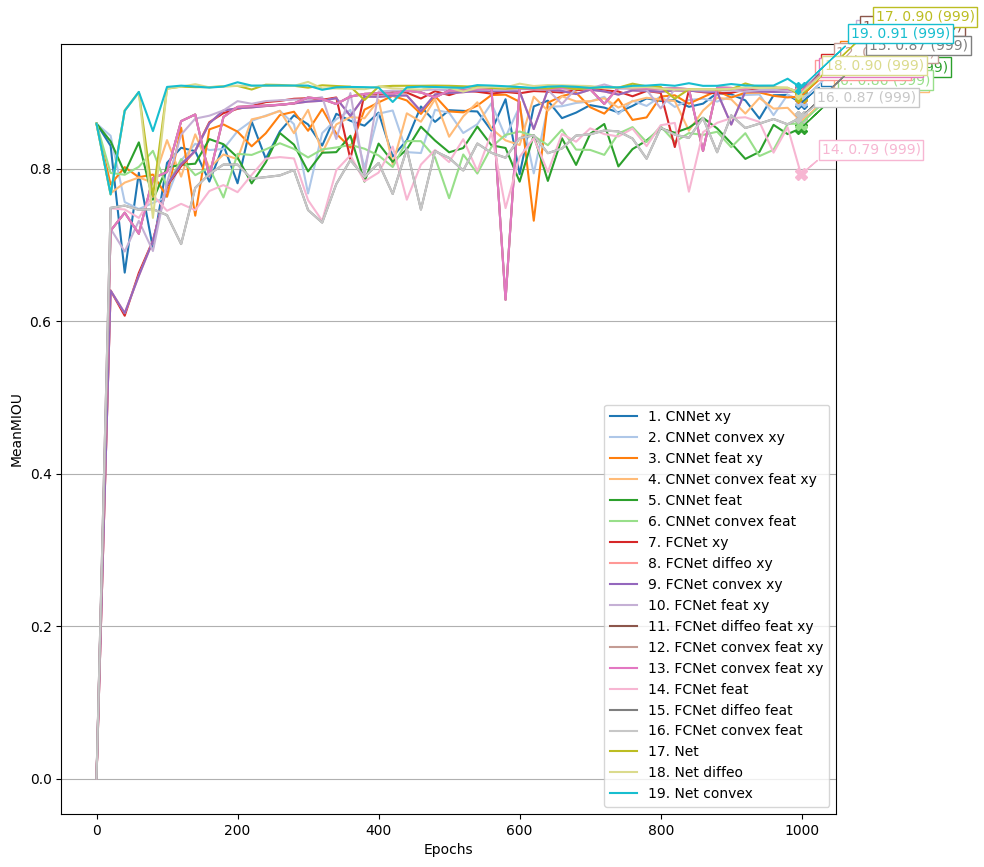

In [51]:
comparison.plot_metric("eval/epoch/MeanMIOU", size=10, last_marker=True, **save_args)

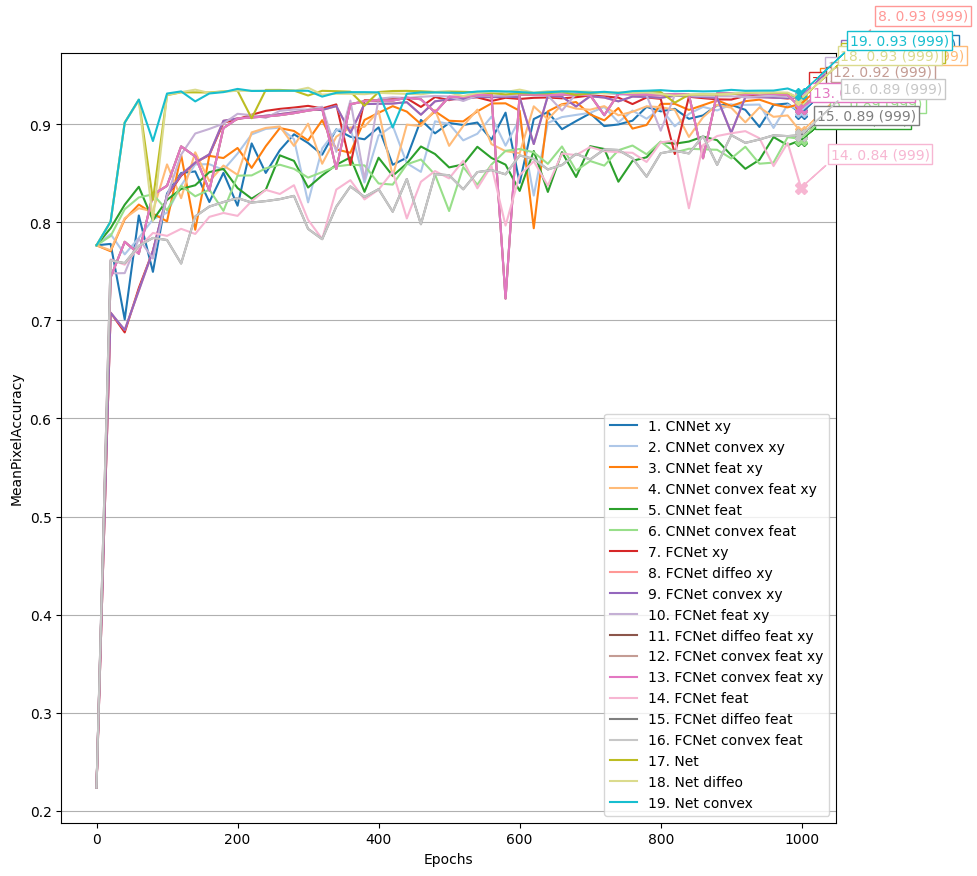

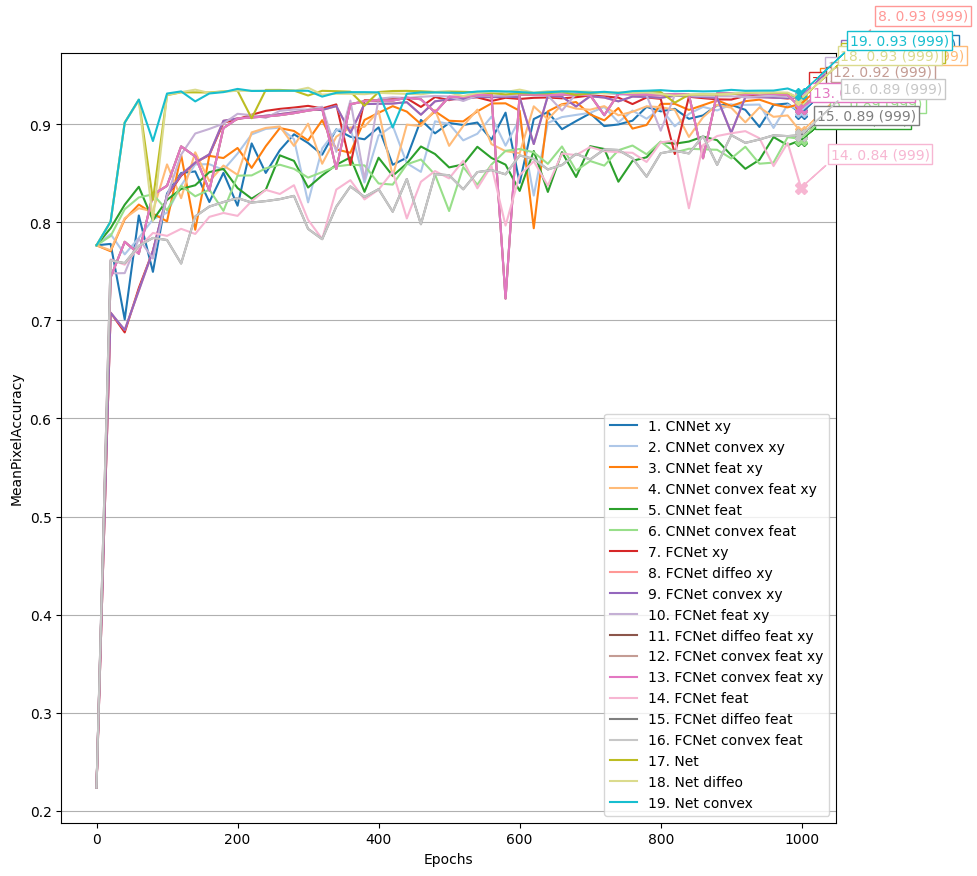

In [52]:
comparison.plot_metric("eval/epoch/MeanPixelAccuracy", size=10, last_marker=True, **save_args)

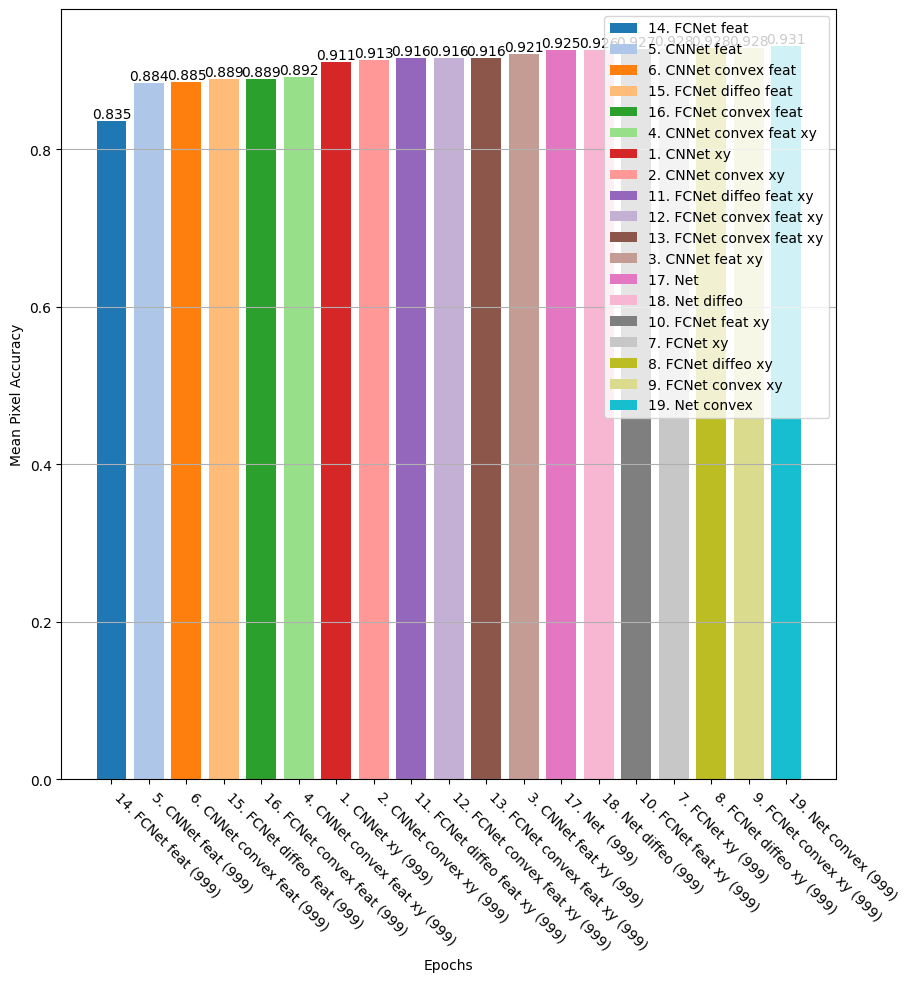

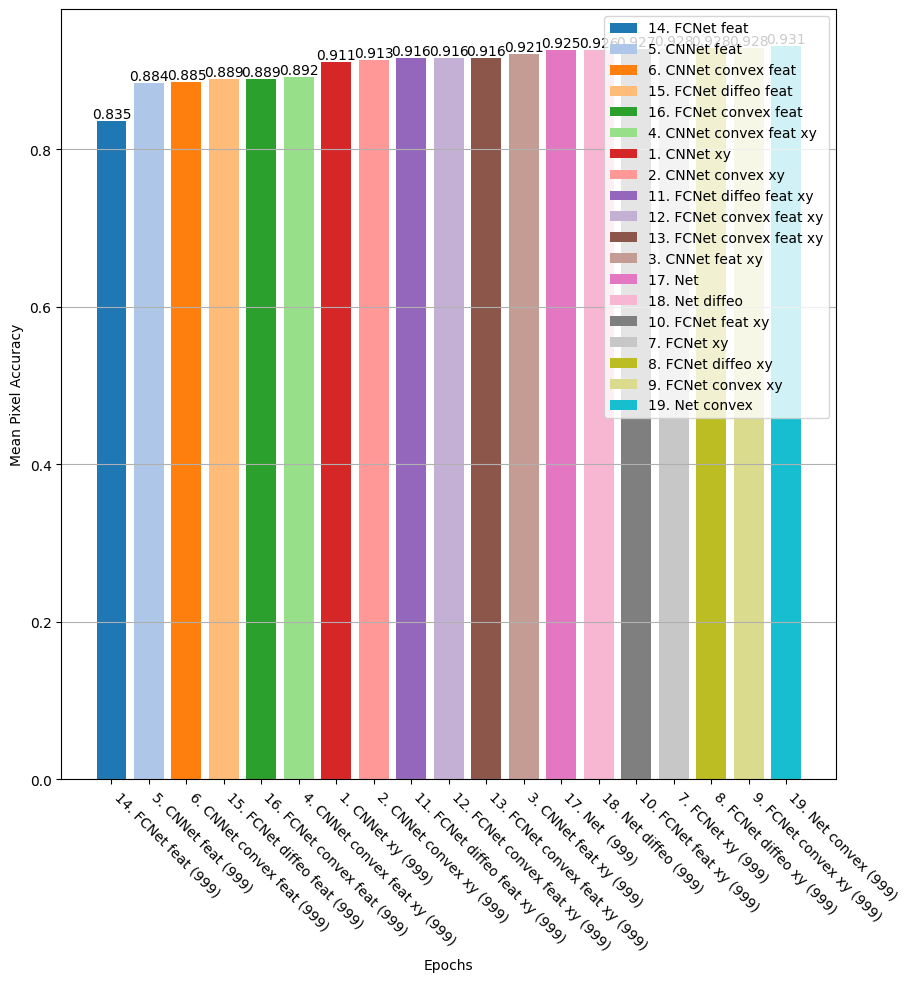

In [53]:
comparison.plot_metric_bar("eval/epoch/MeanPixelAccuracy", 
                           size=10, 
                           top_mode="last", 
                           best_bar=False, 
                           last_bar=True, 
                           ylabel="Mean Pixel Accuracy",
                           ytext_format="{:.3f}",
                           **save_args)

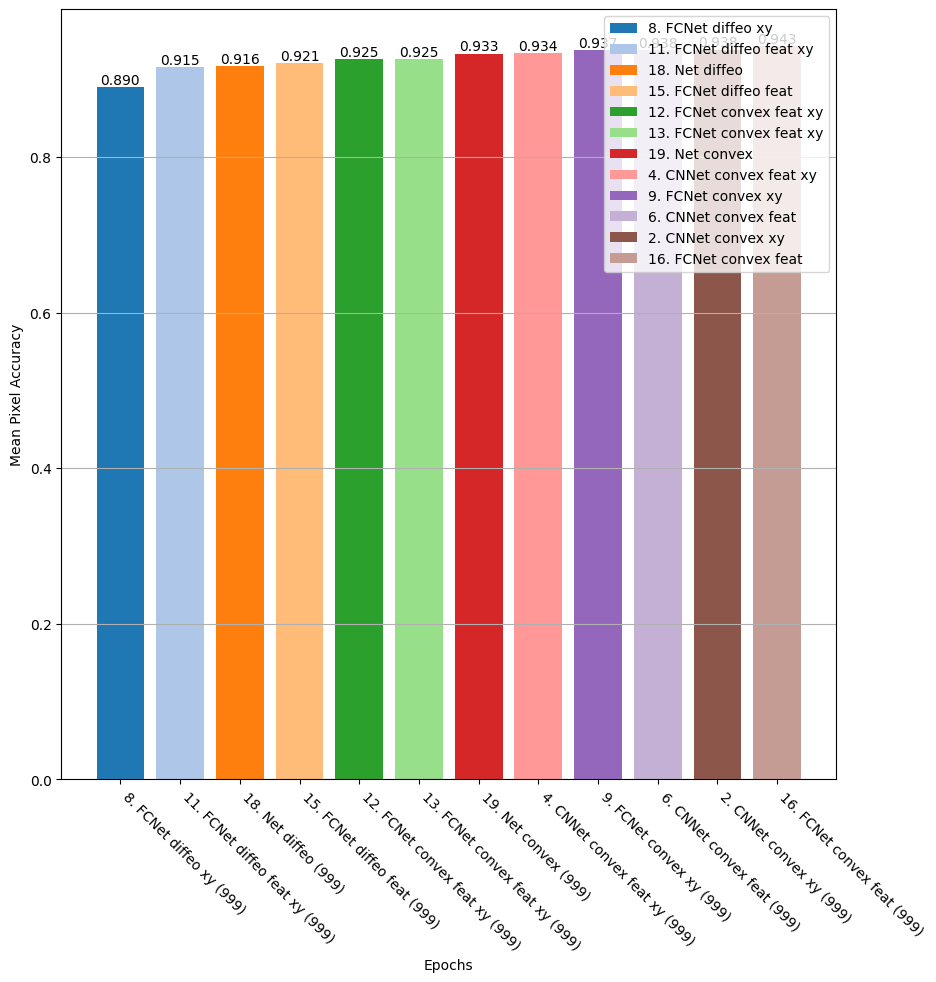

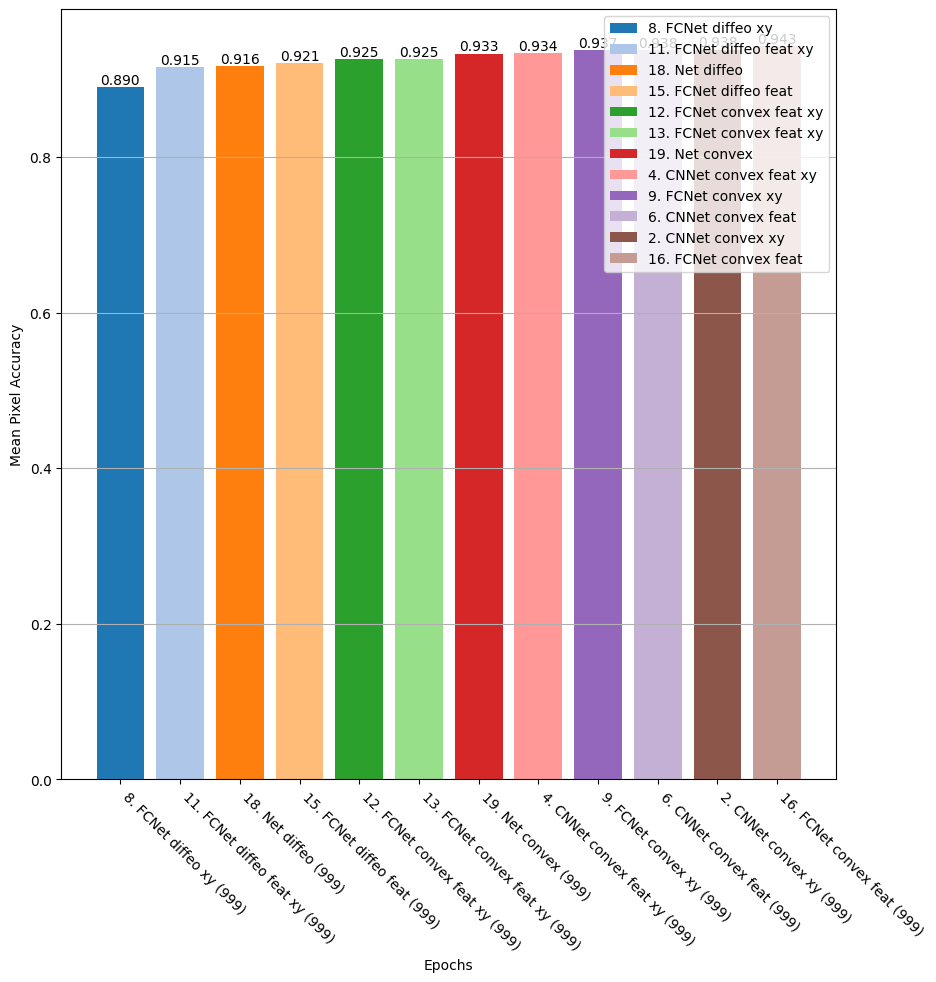

In [54]:
comparison.plot_metric_bar("eval/epoch/MeanPriorPixelAccuracy", 
                           size=10, 
                           top_mode="last", 
                           best_bar=False, 
                           last_bar=True, 
                           ylabel="Mean Pixel Accuracy",
                           ytext_format="{:.3f}",
                           **save_args)

In [55]:
df = comparison.metric_table([
    "eval/epoch/MeanMIOU" ,
    "eval/epoch/MeanPixelAccuracy",
    "eval/epoch/MeanPriorPixelAccuracy",
    "eval/epoch/MeanPriorMIOU"
    ], 
                             ref="last", 
                             mode="max", 
                        column_alias={
                                'eval/epoch/MeanMIOU': 'Mean IoU',
                                'eval/epoch/MeanPixelAccuracy': 'Mean Accuracy',
                                'eval/epoch/MeanPriorPixelAccuracy': 'Mean Prior Accuracy',
                                'eval/epoch/MeanPriorMIOU': 'Mean Prior IoU',
                                'model': "Model",
                                'number': ""
                            },
                        formatting=True)

display(df.hide())

,Model,Mean IoU ↑,Mean Accuracy ↑,Mean Prior Accuracy ↑,Mean Prior IoU ↑
1.,CNNet xy,0.8862,0.9110,-,-
2.,CNNet convex xy,0.8895,0.9133,0.9381,0.9156
3.,CNNet feat xy,0.8947,0.9210,-,-
4.,CNNet convex feat xy,0.8618,0.8918,0.9338,0.9143
5.,CNNet feat,0.8532,0.8839,-,-
6.,CNNet convex feat,0.8593,0.8851,0.9376,0.9133
7.,FCNet xy,0.9028,0.9280,-,-
8.,FCNet diffeo xy,0.9023,0.9281,0.8896,0.8558
9.,FCNet convex xy,0.9023,0.9281,0.9375,0.9170
10.,FCNet feat xy,0.9013,0.9273,-,-


In [57]:
import pandas as pd

def _has_feature(feat: pd.Series, feature_name: str, true_marker="x", false_marker="-"):
    name = feat.name
    _condition = feat.str.contains(feature_name)
    df = _condition.to_frame()
    df[name] = df[name].astype(str)
    df.loc[~_condition, name] = df.where(_condition, false_marker).loc[~_condition, name].astype(str)
    df.loc[_condition, name] = df.where(~_condition, true_marker).loc[_condition, name].astype(str)
    return df[name]

def custom_model_naming(df: pd.DataFrame, **kwargs):
    feat = df['Model'].str.split(" ").str[1:].str.join(" ")
    df['Semantic'] = _has_feature(feat, "feat")
    df['Spacial'] = _has_feature(feat, "xy")
    df['Convex'] = _has_feature(feat, "convex")
    df['Diffeomorphism'] = _has_feature(feat, "diffeo")
    df['Model'] = df['Model'].str.split(" ").str[0]

    df = df.sort_values(["Model", "Semantic", "Spacial", "Convex", "Diffeomorphism"], ascending=[True, True, False, True, True])

    order = ["", "Model", "Semantic", "Spacial", "Convex", "Diffeomorphism", "Mean IoU ↑", "Mean Prior IoU ↑", "Mean Accuracy ↑", "Mean Prior Accuracy ↑"]
    order = order + [col for col in df.columns if col not in order]

    df = df[order]
    return df

style = comparison.metric_table([
    "eval/epoch/MeanMIOU" ,
    "eval/epoch/MeanPixelAccuracy",
    "eval/epoch/MeanPriorPixelAccuracy",
    "eval/epoch/MeanPriorMIOU"
    ], 
                             ref="last", 
                             mode="max", 
                        column_alias={
                                'eval/epoch/MeanMIOU': 'Mean IoU',
                                'eval/epoch/MeanPixelAccuracy': 'Mean Accuracy',
                                'eval/epoch/MeanPriorPixelAccuracy': 'Mean Prior Accuracy',
                                'eval/epoch/MeanPriorMIOU': 'Mean Prior IoU',
                                'model': "Model",
                                'number': ""
                            },
                            custom_formatting=custom_model_naming,
                        formatting=True)



display(style)
print(style.data.iloc[:, 1:].to_markdown())
print(latex_postprocessor(style.hide().to_latex(hrules=True)))


,,Model,Semantic,Spacial,Convex,Diffeomorphism,Mean IoU ↑,Mean Prior IoU ↑,Mean Accuracy ↑,Mean Prior Accuracy ↑
0,1.,CNNet,-,x,-,-,0.8862,-,0.9110,-
1,2.,CNNet,-,x,x,-,0.8895,0.9156,0.9133,0.9381
2,3.,CNNet,x,x,-,-,0.8947,-,0.9210,-
3,4.,CNNet,x,x,x,-,0.8618,0.9143,0.8918,0.9338
4,5.,CNNet,x,-,-,-,0.8532,-,0.8839,-
5,6.,CNNet,x,-,x,-,0.8593,0.9133,0.8851,0.9376
6,7.,FCNet,-,x,-,-,0.9028,-,0.9280,-
7,8.,FCNet,-,x,-,x,0.9023,0.8558,0.9281,0.8896
8,9.,FCNet,-,x,x,-,0.9023,0.9170,0.9281,0.9375
9,10.,FCNet,x,x,-,-,0.9013,-,0.9273,-


|    | Model   | Semantic   | Spacial   | Convex   | Diffeomorphism   |   Mean IoU ↑ |   Mean Prior IoU ↑ |   Mean Accuracy ↑ |   Mean Prior Accuracy ↑ |
|---:|:--------|:-----------|:----------|:---------|:-----------------|-------------:|-------------------:|------------------:|------------------------:|
|  0 | CNNet   | -          | x         | -        | -                |     0.88619  |         nan        |          0.911043 |              nan        |
|  1 | CNNet   | -          | x         | x        | -                |     0.889451 |           0.915638 |          0.913265 |                0.938097 |
|  2 | CNNet   | x          | x         | -        | -                |     0.894728 |         nan        |          0.920974 |              nan        |
|  3 | CNNet   | x          | x         | x        | -                |     0.861761 |           0.914329 |          0.891814 |                0.933818 |
|  4 | CNNet   | x          | -         | -        | -                |     

## Get the sorting to match the tables

In [49]:
[x[1] for x in sorted([(x.number, x.name)for x in comparison.models], key=lambda x: style.data.index.get_loc(x[0] - 1), reverse=False)]

['05_CNNET_benchmark+xy_23_09_15_11_23_00',
 '#02_CNNET_benchmark+xy+convex_23_09_14_15_38_28',
 '#06_CNNET_benchmark+featxy_23_09_14_15_51_37',
 '07_CNNET_benchmark+featxy+convex_23_09_14_16_55_48',
 '#04_CNNET_benchmark+feat_23_09_14_15_51_19',
 '03_CNNET_benchmark+feat+convex_23_09_14_16_53_26',
 '#13_FCNET_benchmark+xy_23_09_14_16_17_02',
 '#1_FCNET_benchmark+xy+diffeo_23_09_15_14_03_01',
 '#11_FCNET_benchmark+xy+convex_23_09_14_16_00_04',
 '#01_FCNET_benchmark+featxy_23_09_14_15_35_38',
 '#0_FCNET_benchmark+featxy+diffeo_23_09_15_13_58_53',
 '#09_FCNET_benchmark+featxy+convex_23_09_14_15_55_38',
 '09_FCNET_benchmark+featxy+convex_23_09_14_17_03_19',
 '#12_FCNET_benchmark+feat_23_09_14_16_01_18',
 '#2_FCNET_benchmark+feat+diffeo_23_09_15_14_03_02',
 '#08_FCNET_benchmark+feat+convex_23_09_14_15_55_38',
 '#00_NET_benchmark_23_09_14_15_31_07',
 'NET_benchmark+diffeo_23_09_18_17_04_55',
 '#10_NET_benchmark+convex_23_09_14_15_56_02']

In [23]:
style = comparison.metric_table([
    "eval/epoch/MeanMIOU" ,
    "eval/epoch/MeanPixelAccuracy",
    "eval/epoch/MeanPriorPixelAccuracy",
    "eval/epoch/MeanPriorMIOU"
    ], 
                             ref="best", 
                             mode="max", 
                        column_alias={
                                'eval/epoch/MeanMIOU': 'Mean IoU',
                                'eval/epoch/MeanPixelAccuracy': 'Mean Accuracy',
                                'eval/epoch/MeanPriorPixelAccuracy': 'Mean Prior Accuracy',
                                'eval/epoch/MeanPriorMIOU': 'Mean Prior IoU',
                                'model': "Model",
                                'number': ""
                            },
                            custom_formatting=custom_model_naming,
                        formatting=True)



display(style)
print(style.data.iloc[:, 1:].to_markdown())

,,Model,Semantic,Spacial,Convex,Diffeomorphism,Mean IoU ↑,Mean Accuracy ↑,Mean Prior IoU ↑,Mean Prior Accuracy ↑
12,13.,CNNet,-,x,-,-,0.8992,0.9211,-,-
2,3.,CNNet,-,x,x,-,0.8974,0.9202,0.92718,0.9465
4,5.,CNNet,x,x,-,-,0.9024,0.9251,-,-
13,14.,CNNet,x,x,x,-,0.8950,0.9201,0.91605,0.9349
3,4.,CNNet,x,-,-,-,0.8668,0.8875,-,-
11,12.,CNNet,x,-,x,-,0.8593,0.8868,0.92405,0.9444
10,11.,FCNet,-,x,-,-,0.9044,0.9294,-,-
16,17.,FCNet,-,x,-,x,0.9036,0.9290,0.90304,0.9289
8,9.,FCNet,-,x,x,-,0.9036,0.9290,0.91701,0.9375
1,2.,FCNet,x,x,-,-,0.9105,0.9321,-,-


|    | Model   | Semantic   | Spacial   | Convex   | Diffeomorphism   |   Mean IoU ↑ |   Mean Accuracy ↑ |   Mean Prior IoU ↑ |   Mean Prior Accuracy ↑ |
|---:|:--------|:-----------|:----------|:---------|:-----------------|-------------:|------------------:|-------------------:|------------------------:|
| 12 | CNNet   | -          | x         | -        | -                |     0.899244 |          0.921137 |         nan        |              nan        |
|  2 | CNNet   | -          | x         | x        | -                |     0.897385 |          0.920157 |           0.92718  |                0.946512 |
|  4 | CNNet   | x          | x         | -        | -                |     0.902354 |          0.925129 |         nan        |              nan        |
| 13 | CNNet   | x          | x         | x        | -                |     0.894998 |          0.920089 |           0.916053 |                0.934889 |
|  3 | CNNet   | x          | -         | -        | -                |     

In [14]:
print(style.data.iloc[:, 1:].to_markdown())

|    | Model   | Semantic   | Spacial   | Convex   | Diffeomorphism   |   Mean IoU ↑ |   Mean Accuracy ↑ |   Mean Prior IoU ↑ |   Mean Prior Accuracy ↑ |
|---:|:--------|:-----------|:----------|:---------|:-----------------|-------------:|------------------:|-------------------:|------------------------:|
| 12 | CNNet   | -          | x         | -        | -                |     0.88619  |          0.911043 |         nan        |              nan        |
|  2 | CNNet   | -          | x         | x        | -                |     0.889451 |          0.913265 |           0.915638 |                0.938097 |
|  4 | CNNet   | x          | x         | -        | -                |     0.894728 |          0.920974 |         nan        |              nan        |
| 13 | CNNet   | x          | x         | x        | -                |     0.861761 |          0.891814 |           0.914329 |                0.933818 |
|  3 | CNNet   | x          | -         | -        | -                |     

In [11]:
_t = feat.str.contains("convex").to_frame().where(feat.str.contains("convex"), "-")['Model']
_t.to_frame().where(~feat.str.contains("convex"), "x")['Model']

AttributeError: 'list' object has no attribute 'str'

In [ ]:
feat = df['Model'].str.split(" ").str[1:].str.join(" ")
feat

0        convex feat
1               feat
2          convex xy
3                 xy
4        convex feat
5     convex feat xy
6            feat xy
7               feat
8                 xy
9             convex
10                  
Name: Model, dtype: object

In [ ]:
df['Model'].str.split(" ").str[1:].str.join(" ").str.contains("convex")

0     True
1    False
2     True
3    False
4     True
5     True
6    False
7    False
8    False
9    False
Name: Model, dtype: bool

In [ ]:
df.data.hide_index()

AttributeError: 'DataFrame' object has no attribute 'hide_index'

In [ ]:
from awesome.agent.torch_agent_checkpoint import TorchAgentCheckpoint


ckp_path = "D:/projects/AWESOME/runs/CNNET_benchmark+feat_23_09_12_18_51_47/checkpoint_epoch_600.pth"

ckp = TorchAgentCheckpoint.load(ckp_path)

FileNotFoundError: [Errno 2] No such file or directory: 'D:/projects/AWESOME/runs/CNNET_benchmark+feat_23_09_12_18_51_47/checkpoint_epoch_600.pth'

In [ ]:
from awesome.analytics.result_comparison import ResultComparison


path = 'runs/'

models = []

for folder in os.listdir(path):
    if folder == "Benchmarks":
        continue
    if not os.path.isdir(os.path.join(path, folder)):
        continue
    model = ResultModel.from_path(os.path.join(path, folder))
    models.append(model)

import re
p = r"(?P<net>\w+)_benchmark(?P<feat>(\+\w+)*)\_"
pattern = re.compile(p)

for model in models:
    match = pattern.match(model.name)
    model_name = None
    feat = []
    if match:
        model_name = match.group('net')
        features = match.group('feat')
        if features is not None and features != "":
            feat = features.strip("+").split("+")
            if "featxy" in feat:
                feat.remove("featxy")
                feat.append("feat")
                feat.append("xy")
            feat = sorted(feat)
    else:
        print('No match for', model.name)
    model_name = model_name.replace("NET", "Net")
    model.display_name = model_name + " " + " ".join(feat)

comparison = ResultComparison(models)
comparison.assign_numbers(force=True)

os.environ['PLOT_OUTPUT_DIR'] = comparison.output_folder

save_args = dict(transparent=False, save=True, dpi=300, ext=["png", "pdf"])

models

[ResultModel(config=ResultModelConfig(name='Test_CNNet convex_23_09_14_15_21 feat', number=1, result_directory='result', epochs=[]), output_directory=runs/Test_CNNET_benchmark+feat+convex_23_09_14_15_21_16, numbering=True, index=[...], checkpoint_index=[...], _run_config=None, _runners={}, run_config_path=runs/Test_CNNET_benchmark+feat+convex_23_09_14_15_21_16\init_cfg_awesome_config.yaml, rerun_parent=None)]

In [ ]:
{k:v for k,v in models[0].get_tracker(-1).metrics.items() if 'PixelAccuracy' in k}

{'eval/epoch/PixelAccuracy': MetricSummary(tag='eval/epoch/PixelAccuracy', values=                                                  value global_step
 step                                                               
 0     [0.82957894, 0.79215497, 0.60896987, 0.5018998...           0, mode=<MetricMode.VALIDATION: 'eval'>, scope=<MetricScope.EPOCH: 'epoch'>, is_primary=False, metric_qualname='awesome.measures.pixel_accuracy.PixelAccuracy'),
 'eval/epoch/MeanPixelAccuracy': MetricSummary(tag='eval/epoch/MeanPixelAccuracy', values=         value global_step
 step                      
 0     0.776558           0, mode=<MetricMode.VALIDATION: 'eval'>, scope=<MetricScope.EPOCH: 'epoch'>, is_primary=False, metric_qualname='awesome.measures.pixel_accuracy.PixelAccuracy'),
 'eval/epoch/PriorPixelAccuracy': MetricSummary(tag='eval/epoch/PriorPixelAccuracy', values=                                                  value global_step
 step                                                        

In [ ]:
ckp.tracker.metrics['eval/epoch/MeanMIOU']

MetricSummary(tag='eval/epoch/MeanMIOU', values=         value global_step
step                      
0     0.859124           0
20    0.787501          20
40    0.748464          40
60    0.773643          60
80    0.777049          80
100   0.809455         100
120   0.779933         120
140   0.759753         140
160   0.812502         160
180   0.819608         180
200   0.810473         200
220    0.77384         220
240   0.829944         240
260   0.807757         260
280   0.787049         280
300   0.813928         300
320   0.833643         320
340    0.77904         340
360    0.72336         360
380   0.817563         380
400   0.828924         400
420   0.838888         420
440   0.833211         440
460   0.823466         460
480   0.832607         480
500   0.830928         500
520   0.840681         520
540   0.772122         540
560   0.807197         560
580   0.825112         580
599    0.80629         599, mode=<MetricMode.VALIDATION: 'eval'>, scope=<MetricScope.EPO